In [1]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# Importing the dataset using Pandas

data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# Printing the first five data points from the data

data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
print('Total number of data points:', data.shape[0])

Total number of data points: 5110


### Data Analysis

In [5]:
def bar(x): # function returns a bar plot
    plt.figure(figsize = (5,5))
    sns.countplot(x)
    plt.show()
    
def pie(x): # function returns the pie chart
    plt.figure(figsize = (5,5))
    x.value_counts().plot(kind="pie")
    plt.show()
    
def bar_two(x,y): # function takes two variables and returns a bar plot
    df=data.groupby([x,y])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
    plot = sns.catplot(x=x, y="count",col=y,data=df, kind="bar",height=4)
    plt.show()
    
def pdf(x,y): # function returns a probability density function
    sns.FacetGrid(data, hue=y, size = 6).map(sns.distplot, x).add_legend()
    plt.title('Probability Density Function')
    plt.show()

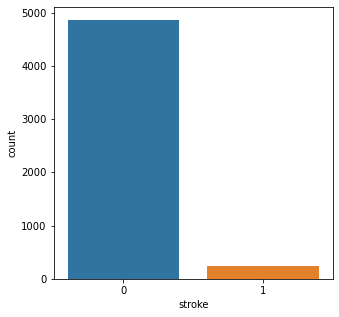

In [6]:
bar(data['stroke'])

In [7]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

As we can observe from the above figure, the dependent variable has more number of adults who have suffered heart stroke

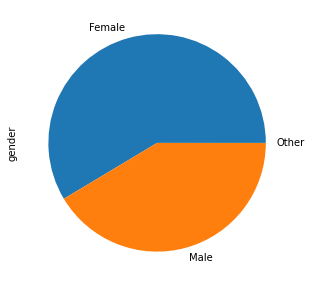

In [8]:
pie(data['gender'])

In [9]:
data['gender'].value_counts() # returns the count of population in each gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The female population is greater than the male population

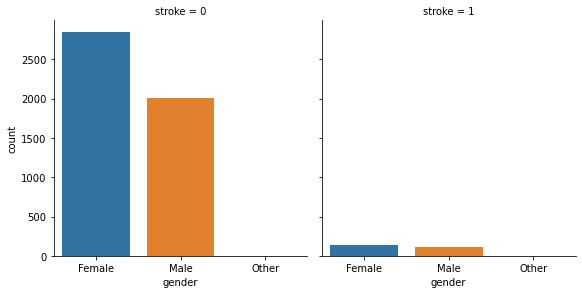

In [10]:
bar_two('gender', 'stroke')

In [11]:
data.groupby('stroke')['gender'].value_counts() # returns the count of population affected by strokes for each gender

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
Name: gender, dtype: int64

an overall percentage of 5.1% of male population were affected by the heart strokes, while, 4.7% of the total female population were affected by the heart strokes.

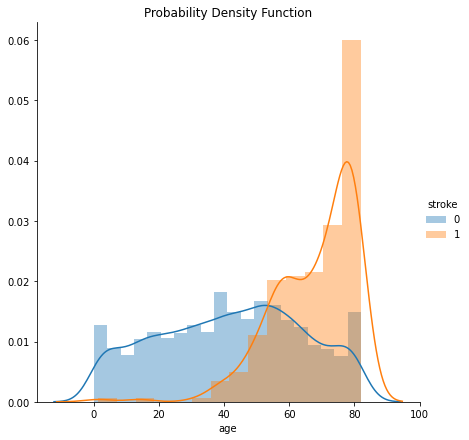

In [12]:
pdf('age','stroke')

age groups between 50 to 80 are at higher risk of being affected by heart stroke.

In [13]:
fig = data.groupby(['smoking_status','stroke']).apply(lambda x:x['smoking_status'].count()).reset_index(name='counts')
px.bar(fig, x='smoking_status', y='counts', color='stroke')

In [14]:
fig = data.groupby(['ever_married','stroke']).apply(lambda x:x['ever_married'].count()).reset_index(name='counts')
px.bar(fig, x='ever_married', y='counts', color='stroke')

In [15]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [16]:
data.groupby('stroke')['ever_married'].value_counts() # returns the count of population affected by strokes for each gender

stroke  ever_married
0       Yes             3133
        No              1728
1       Yes              220
        No                29
Name: ever_married, dtype: int64

The data shows that the people who are married are at higher risk of being affected by heart attacks.

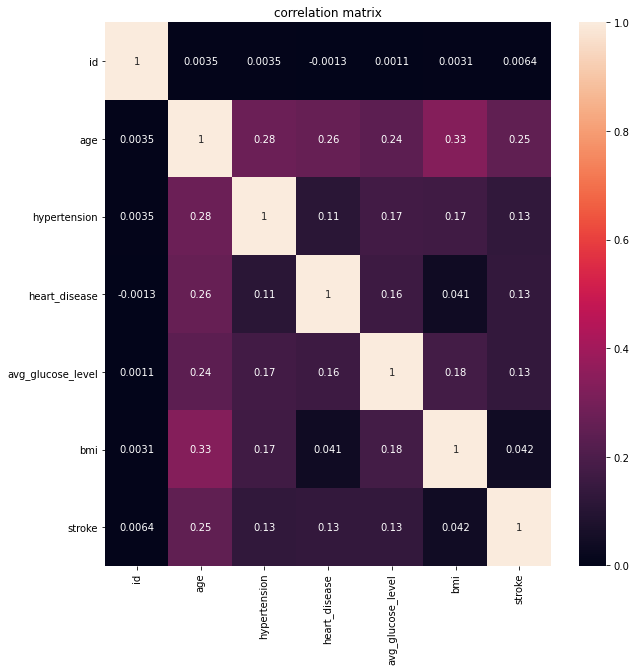

In [17]:
plt.figure(figsize = (10,10))
plt.title('correlation matrix')
sns.heatmap(data.corr(), annot=True)
plt.show()